# Fake News Classifier Using LSTM
Dataset: https://www.kaggle.com/c/fake-news/data#

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [2]:
df=pd.read_csv('/content/drive/MyDrive/Fake News Dataset/train.csv')

In [3]:
df.head()

,id,title,author,text,label
0,0,House Dem Aide: We Didn’t Even See Comey’s Let...,Darrell Lucus,House Dem Aide: We Didn’t Even See Comey’s Let...,1
1,1,"FLYNN: Hillary Clinton, Big Woman on Campus - ...",Daniel J. Flynn,Ever get the feeling your life circles the rou...,0
2,2,Why the Truth Might Get You Fired,Consortiumnews.com,"Why the Truth Might Get You Fired October 29, ...",1
3,3,15 Civilians Killed In Single US Airstrike Hav...,Jessica Purkiss,Videos 15 Civilians Killed In Single US Airstr...,1
4,4,Iranian woman jailed for fictional unpublished...,Howard Portnoy,Print \nAn Iranian woman has been sentenced to...,1


In [4]:
df.isna().sum()

id           0
title      558
author    1957
text        39
label        0
dtype: int64

In [5]:
df=df.dropna()

In [6]:
df

,id,title,author,text,label
0,0,House Dem Aide: We Didn’t Even See Comey’s Let...,Darrell Lucus,House Dem Aide: We Didn’t Even See Comey’s Let...,1
1,1,"FLYNN: Hillary Clinton, Big Woman on Campus - ...",Daniel J. Flynn,Ever get the feeling your life circles the rou...,0
2,2,Why the Truth Might Get You Fired,Consortiumnews.com,"Why the Truth Might Get You Fired October 29, ...",1
3,3,15 Civilians Killed In Single US Airstrike Hav...,Jessica Purkiss,Videos 15 Civilians Killed In Single US Airstr...,1
4,4,Iranian woman jailed for fictional unpublished...,Howard Portnoy,Print \nAn Iranian woman has been sentenced to...,1
...,...,...,...,...,...
20795,20795,Rapper T.I.: Trump a ’Poster Child For White S...,Jerome Hudson,Rapper T. I. unloaded on black celebrities who...,0
20796,20796,"N.F.L. Playoffs: Schedule, Matchups and Odds -...",Benjamin Hoffman,When the Green Bay Packers lost to the Washing...,0
20797,20797,Macy’s Is Said to Receive Takeover Approach by...,Michael J. de la Merced and Rachel Abrams,The Macy’s of today grew from the union of sev...,0
20798,20798,"NATO, Russia To Hold Parallel Exercises In Bal...",Alex Ansary,"NATO, Russia To Hold Parallel Exercises In Bal...",1


In [7]:
X=df.drop('label',axis=1)

In [8]:
y=df['label']

In [9]:
X.shape

(18285, 4)

In [10]:
import tensorflow as tf
from tensorflow.keras.layers import Embedding
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.models import Sequential
from tensorflow.keras.preprocessing.text import one_hot
from tensorflow.keras.layers import LSTM,GRU,Bidirectional,Conv1D,GlobalAveragePooling1D
from tensorflow.keras.layers import Dense

In [11]:
## Vocab Size

vocab_size=5000

In [12]:
sentence=X.copy()

In [13]:
sentence['title'][1]

'FLYNN: Hillary Clinton, Big Woman on Campus - Breitbart'

In [14]:
sentence.index=[i for i in range(len(sentence))]

In [15]:
sentence.head(10)

,id,title,author,text
0,0,House Dem Aide: We Didn’t Even See Comey’s Let...,Darrell Lucus,House Dem Aide: We Didn’t Even See Comey’s Let...
1,1,"FLYNN: Hillary Clinton, Big Woman on Campus - ...",Daniel J. Flynn,Ever get the feeling your life circles the rou...
2,2,Why the Truth Might Get You Fired,Consortiumnews.com,"Why the Truth Might Get You Fired October 29, ..."
3,3,15 Civilians Killed In Single US Airstrike Hav...,Jessica Purkiss,Videos 15 Civilians Killed In Single US Airstr...
4,4,Iranian woman jailed for fictional unpublished...,Howard Portnoy,Print \nAn Iranian woman has been sentenced to...
5,5,Jackie Mason: Hollywood Would Love Trump if He...,Daniel Nussbaum,"In these trying times, Jackie Mason is the Voi..."
6,7,Benoît Hamon Wins French Socialist Party’s Pre...,Alissa J. Rubin,"PARIS — France chose an idealistic, traditi..."
7,9,"A Back-Channel Plan for Ukraine and Russia, Co...",Megan Twohey and Scott Shane,A week before Michael T. Flynn resigned as nat...
8,10,Obama’s Organizing for Action Partners with So...,Aaron Klein,"Organizing for Action, the activist group that..."
9,11,"BBC Comedy Sketch ""Real Housewives of ISIS"" Ca...",Chris Tomlinson,The BBC produced spoof on the “Real Housewives...


In [16]:
import nltk
import re
from nltk.corpus import stopwords

In [17]:
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


True

In [18]:
### Dataset Preprocessing
from nltk.stem.porter import PorterStemmer ##stemming purpose
ps = PorterStemmer()
corpus = []
for i in range(0, len(sentence)):
    review = re.sub('[^a-zA-Z]', ' ', sentence['title'][i])
    review = review.lower()
    review = review.split()
    review = [ps.stem(word) for word in review if not word in stopwords.words('english')]
    review = ' '.join(review)
    corpus.append(review)

In [19]:
corpus

['hous dem aid even see comey letter jason chaffetz tweet',
 'flynn hillari clinton big woman campu breitbart',
 'truth might get fire',
 'civilian kill singl us airstrik identifi',
 'iranian woman jail fiction unpublish stori woman stone death adulteri',
 'jacki mason hollywood would love trump bomb north korea lack tran bathroom exclus video breitbart',
 'beno hamon win french socialist parti presidenti nomin new york time',
 'back channel plan ukrain russia courtesi trump associ new york time',
 'obama organ action partner soro link indivis disrupt trump agenda',
 'bbc comedi sketch real housew isi caus outrag',
 'russian research discov secret nazi militari base treasur hunter arctic photo',
 'us offici see link trump russia',
 'ye paid govern troll social media blog forum websit',
 'major leagu soccer argentin find home success new york time',
 'well fargo chief abruptli step new york time',
 'anonym donor pay million releas everyon arrest dakota access pipelin',
 'fbi close hilla

In [20]:
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator

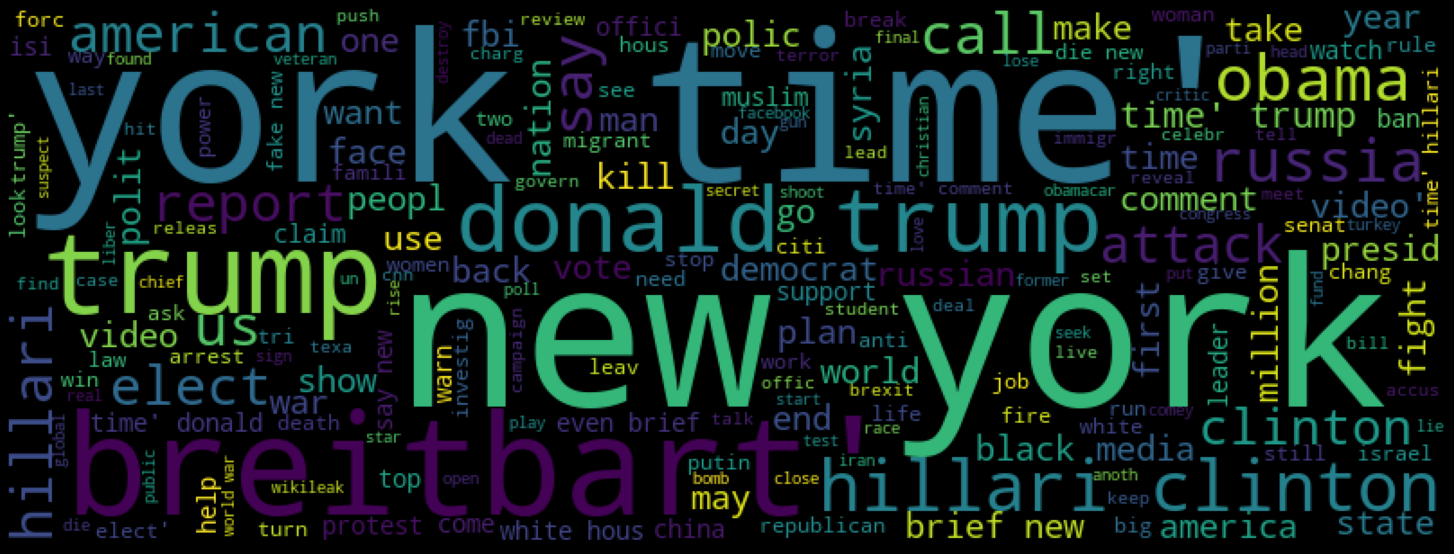

In [21]:
wordcloud = WordCloud(width=800, height=300).generate(str(corpus))
plt.figure( figsize=(20,10), facecolor='k')
plt.imshow(wordcloud)
plt.axis("off")
plt.tight_layout(pad=0)
plt.show()

In [ ]:
from sklearn.metrics import confusion_matrix,classification_report,precision_recall_fscore_support,accuracy_score

def calculate_result(y_true,y_pred):
  
  """
  In this f(x) we can calculate result from the all types of metrics.
  input: y_true,y_pred
  returns: results
  """

  precision,recall,f1_score,_=precision_recall_fscore_support(y_true,y_pred,average='weighted')
  accuracy=accuracy_score(y_true,y_pred)
  results={
      "Precision":precision,
      "Recall":recall,
      "Accuracy":accuracy,
      "F1-score":f1_score
  }
  print("\t \t \t \t Results")
  print()
  print('Confusion Matrix:')
  print(confusion_matrix(y_true,y_pred))
  print(classification_report(y_true,y_pred))

  return results

## Baseline Model 0: BOW Features Extractor

In [ ]:
# Creating the Bag of Words model
from sklearn.feature_extraction.text import CountVectorizer
cv = CountVectorizer(binary=True)
X = cv.fit_transform(corpus).toarray()

In [ ]:
from sklearn.model_selection import train_test_split

X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.33,random_state=42)

In [ ]:
## Applying Multinomial Navie Bayes
from sklearn.naive_bayes import MultinomialNB
baseline_model_0=MultinomialNB().fit(X_train,y_train)

In [ ]:
y_pred=baseline_model_0.predict(X_test)
baseline_model_0_results=calculate_result(y_test,y_pred)

	 	 	 	 Results

Confusion Matrix:
[[3223  196]
 [ 429 2187]]
              precision    recall  f1-score   support

           0       0.88      0.94      0.91      3419
           1       0.92      0.84      0.87      2616

    accuracy                           0.90      6035
   macro avg       0.90      0.89      0.89      6035
weighted avg       0.90      0.90      0.90      6035



## Baseline Model 1: Tfidf Features Extractor

In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer
tf=TfidfVectorizer()
X=tf.fit_transform(corpus).toarray()

In [ ]:
from sklearn.model_selection import train_test_split

X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.33,random_state=42)

In [ ]:
## Applying Multinomial Navie Bayes
from sklearn.naive_bayes import MultinomialNB
baseline_model_1=MultinomialNB().fit(X_train,y_train)

In [ ]:
y_pred=baseline_model_1.predict(X_test)
baseline_model_1_results=calculate_result(y_test,y_pred)

	 	 	 	 Results

Confusion Matrix:
[[3312  107]
 [ 813 1803]]
              precision    recall  f1-score   support

           0       0.80      0.97      0.88      3419
           1       0.94      0.69      0.80      2616

    accuracy                           0.85      6035
   macro avg       0.87      0.83      0.84      6035
weighted avg       0.86      0.85      0.84      6035



In [ ]:
one_hot_rep=[one_hot(word,vocab_size) for word in corpus]
one_hot_rep

[[1474, 2523, 3306, 1602, 3795, 607, 4425, 3212, 4540, 3460],
 [1761, 3121, 2370, 3618, 2895, 3929, 1236],
 [1250, 2505, 1401, 536],
 [4290, 782, 3592, 2900, 3211, 2474],
 [3569, 2895, 4762, 1202, 4192, 2673, 2895, 2281, 341, 4274],
 [2371,
  1907,
  26,
  3930,
  3710,
  4451,
  3853,
  1554,
  4401,
  3854,
  732,
  4815,
  4670,
  1526,
  1236],
 [4980, 3948, 1129, 1875, 1287, 1258, 3880, 2217, 577, 4097, 4466],
 [4113, 2115, 631, 1615, 3935, 2158, 4451, 4387, 577, 4097, 4466],
 [4418, 2208, 4419, 25, 3912, 2819, 2443, 1287, 4451, 4274],
 [1515, 4768, 294, 3455, 1357, 1371, 2833, 3037],
 [4468, 921, 711, 1318, 3241, 3694, 4671, 3186, 122, 2511, 4986],
 [2900, 1153, 3795, 2819, 4451, 3935],
 [2633, 3408, 3015, 780, 4198, 3960, 2526, 2572, 2095],
 [1006, 1562, 4533, 2335, 1576, 4352, 3988, 577, 4097, 4466],
 [378, 4563, 2697, 576, 2036, 577, 4097, 4466],
 [4808, 1451, 416, 1793, 2034, 524, 2108, 1889, 4496, 2555],
 [1587, 2712, 3121],
 [2028, 3138, 4982, 2323, 4451, 3279, 1849, 1236],

In [ ]:
corpus[2]

'truth might get fire'

In [ ]:
one_hot_rep[2]

[1250, 2505, 1401, 536]

# Embedding Representation

In [ ]:
sent_length=20
embedd_docs=pad_sequences(one_hot_rep,padding='post',maxlen=sent_length)
print(embedd_docs)

[[1474 2523 3306 ...    0    0    0]
 [1761 3121 2370 ...    0    0    0]
 [1250 2505 1401 ...    0    0    0]
 ...
 [2568 3906 1989 ...    0    0    0]
 [3432 3935  365 ...    0    0    0]
 [2445 1428 2198 ...    0    0    0]]


In [ ]:
embedd_docs[2]

array([1250, 2505, 1401,  536,    0,    0,    0,    0,    0,    0,    0,
          0,    0,    0,    0,    0,    0,    0,    0,    0], dtype=int32)

## Model 2: LSTM

In [ ]:
## Create Model

embedding_vector_feature=40
model_2=Sequential()
model_2.add(Embedding(vocab_size,embedding_vector_feature,input_length=sent_length))
model_2.add(LSTM(100))
model_2.add(Dense(1,activation='sigmoid'))
model_2.compile(
    loss='binary_crossentropy',
    optimizer='adam',
    metrics=['accuracy']
)

In [ ]:
model_2.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding (Embedding)       (None, 20, 40)            200000    
                                                                 
 lstm (LSTM)                 (None, 100)               56400     
                                                                 
 dense (Dense)               (None, 1)                 101       
                                                                 
Total params: 256,501
Trainable params: 256,501
Non-trainable params: 0
_________________________________________________________________


In [ ]:
len(embedd_docs)

18285

In [ ]:
import numpy as np
X=np.array(embedd_docs)
y=np.array(y)

In [ ]:
X.shape,y.shape

((18285, 20), (18285,))

In [ ]:
from sklearn.model_selection import train_test_split

X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.33,random_state=42)

In [ ]:
history=model_2.fit(X_train,y_train,validation_data=(X_test,y_test),epochs=10,
          batch_size=64)

Epoch 1/10
192/192 [==============================] - 9s 9ms/step - loss: 0.3302 - accuracy: 0.8407 - val_loss: 0.2325 - val_accuracy: 0.8978
Epoch 2/10
192/192 [==============================] - 1s 7ms/step - loss: 0.1329 - accuracy: 0.9494 - val_loss: 0.1996 - val_accuracy: 0.9163
Epoch 3/10
192/192 [==============================] - 1s 7ms/step - loss: 0.0745 - accuracy: 0.9731 - val_loss: 0.2609 - val_accuracy: 0.9115
Epoch 4/10
192/192 [==============================] - 1s 7ms/step - loss: 0.0478 - accuracy: 0.9834 - val_loss: 0.2611 - val_accuracy: 0.9034
Epoch 5/10
192/192 [==============================] - 1s 7ms/step - loss: 0.0357 - accuracy: 0.9867 - val_loss: 0.3395 - val_accuracy: 0.9027
Epoch 6/10
192/192 [==============================] - 1s 7ms/step - loss: 0.0254 - accuracy: 0.9916 - val_loss: 0.4082 - val_accuracy: 0.9029
Epoch 7/10
192/192 [==============================] - 1s 7ms/step - loss: 0.0144 - accuracy: 0.9955 - val_loss: 0.4639 - val_accuracy: 0.8943
Epoch 

In [ ]:
y_pred=model_2.predict(X_test)
y_pred

array([[9.9986851e-01],
       [2.9520825e-03],
       [6.7424029e-05],
       ...,
       [4.6524772e-05],
       [9.9985671e-01],
       [9.5134228e-01]], dtype=float32)

In [ ]:
y_pred=np.squeeze(np.round(y_pred))
y_pred

array([1., 0., 0., ..., 0., 1., 1.], dtype=float32)

In [ ]:
y_test

array([1, 0, 0, ..., 0, 1, 1])

In [ ]:
model_2_results=calculate_result(y_test,y_pred)

	 	 	 	 Results

Confusion Matrix:
[[3088  331]
 [ 303 2313]]
              precision    recall  f1-score   support

           0       0.91      0.90      0.91      3419
           1       0.87      0.88      0.88      2616

    accuracy                           0.89      6035
   macro avg       0.89      0.89      0.89      6035
weighted avg       0.90      0.89      0.90      6035



## Model 3: GRU

In [ ]:
## Create Model

embedding_vector_feature=40
model_3=Sequential()
model_3.add(Embedding(vocab_size,embedding_vector_feature,input_length=sent_length))
model_3.add(GRU(100))
model_3.add(Dense(1,activation='sigmoid'))
model_3.compile(
    loss='binary_crossentropy',
    optimizer='adam',
    metrics=['accuracy']
)

In [ ]:
model_3.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_1 (Embedding)     (None, 20, 40)            200000    
                                                                 
 gru (GRU)                   (None, 100)               42600     
                                                                 
 dense_1 (Dense)             (None, 1)                 101       
                                                                 
Total params: 242,701
Trainable params: 242,701
Non-trainable params: 0
_________________________________________________________________


In [ ]:
history_3=model_3.fit(X_train,y_train,validation_data=(X_test,y_test),epochs=10,
          batch_size=64)

Epoch 1/10
192/192 [==============================] - 3s 8ms/step - loss: 0.3880 - accuracy: 0.7921 - val_loss: 0.2064 - val_accuracy: 0.9127
Epoch 2/10
192/192 [==============================] - 1s 6ms/step - loss: 0.1490 - accuracy: 0.9425 - val_loss: 0.2090 - val_accuracy: 0.9196
Epoch 3/10
192/192 [==============================] - 1s 7ms/step - loss: 0.1000 - accuracy: 0.9655 - val_loss: 0.2575 - val_accuracy: 0.9148
Epoch 4/10
192/192 [==============================] - 1s 6ms/step - loss: 0.0631 - accuracy: 0.9794 - val_loss: 0.2637 - val_accuracy: 0.9099
Epoch 5/10
192/192 [==============================] - 1s 6ms/step - loss: 0.0414 - accuracy: 0.9864 - val_loss: 0.3495 - val_accuracy: 0.9090
Epoch 6/10
192/192 [==============================] - 1s 6ms/step - loss: 0.0317 - accuracy: 0.9898 - val_loss: 0.3230 - val_accuracy: 0.9046
Epoch 7/10
192/192 [==============================] - 1s 7ms/step - loss: 0.0204 - accuracy: 0.9940 - val_loss: 0.4070 - val_accuracy: 0.9004
Epoch 

In [ ]:
y_pred=model_3.predict(X_test)
y_pred

array([[9.9949670e-01],
       [1.0104318e-04],
       [1.8214695e-04],
       ...,
       [1.0801680e-04],
       [9.9942613e-01],
       [9.9854714e-01]], dtype=float32)

In [ ]:
y_pred=np.squeeze(np.round(y_pred))
y_pred

array([1., 0., 0., ..., 0., 1., 1.], dtype=float32)

In [ ]:
model_3_results=calculate_result(y_test,y_pred)

	 	 	 	 Results

Confusion Matrix:
[[3086  333]
 [ 213 2403]]
              precision    recall  f1-score   support

           0       0.94      0.90      0.92      3419
           1       0.88      0.92      0.90      2616

    accuracy                           0.91      6035
   macro avg       0.91      0.91      0.91      6035
weighted avg       0.91      0.91      0.91      6035



# Model 4: Bidirectional LSTM

In [ ]:
## Create Model

embedding_vector_feature=40
model_4=Sequential()
model_4.add(Embedding(vocab_size,embedding_vector_feature,input_length=sent_length))
model_4.add(Bidirectional(LSTM(100)))
model_4.add(Dense(1,activation='sigmoid'))
model_4.compile(
    loss='binary_crossentropy',
    optimizer='adam',
    metrics=['accuracy']
)

In [ ]:
model_4.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_2 (Embedding)     (None, 20, 40)            200000    
                                                                 
 bidirectional (Bidirectiona  (None, 200)              112800    
 l)                                                              
                                                                 
 dense_2 (Dense)             (None, 1)                 201       
                                                                 
Total params: 313,001
Trainable params: 313,001
Non-trainable params: 0
_________________________________________________________________


In [ ]:
history_3=model_4.fit(X_train,y_train,validation_data=(X_test,y_test),epochs=10,
          batch_size=64)

Epoch 1/10
192/192 [==============================] - 5s 13ms/step - loss: 0.3231 - accuracy: 0.8477 - val_loss: 0.1836 - val_accuracy: 0.9206
Epoch 2/10
192/192 [==============================] - 2s 10ms/step - loss: 0.1278 - accuracy: 0.9516 - val_loss: 0.2001 - val_accuracy: 0.9105
Epoch 3/10
192/192 [==============================] - 2s 10ms/step - loss: 0.0708 - accuracy: 0.9756 - val_loss: 0.2425 - val_accuracy: 0.9157
Epoch 4/10
192/192 [==============================] - 2s 10ms/step - loss: 0.0441 - accuracy: 0.9865 - val_loss: 0.2817 - val_accuracy: 0.9110
Epoch 5/10
192/192 [==============================] - 2s 10ms/step - loss: 0.0301 - accuracy: 0.9917 - val_loss: 0.3747 - val_accuracy: 0.9123
Epoch 6/10
192/192 [==============================] - 2s 10ms/step - loss: 0.0171 - accuracy: 0.9955 - val_loss: 0.4512 - val_accuracy: 0.9067
Epoch 7/10
192/192 [==============================] - 2s 10ms/step - loss: 0.0150 - accuracy: 0.9958 - val_loss: 0.4861 - val_accuracy: 0.9097

In [ ]:
y_pred=model_4.predict(X_test)
y_pred

array([[9.9995732e-01],
       [6.2065249e-07],
       [3.6377924e-06],
       ...,
       [1.8341090e-07],
       [9.9991393e-01],
       [9.9878949e-01]], dtype=float32)

In [ ]:
y_pred=np.squeeze(np.round(y_pred))
y_pred

array([1., 0., 0., ..., 0., 1., 1.], dtype=float32)

In [ ]:
model_4_results=calculate_result(y_test,y_pred)

	 	 	 	 Results

Confusion Matrix:
[[3139  280]
 [ 317 2299]]
              precision    recall  f1-score   support

           0       0.91      0.92      0.91      3419
           1       0.89      0.88      0.89      2616

    accuracy                           0.90      6035
   macro avg       0.90      0.90      0.90      6035
weighted avg       0.90      0.90      0.90      6035



## Model 5: Bidirectional GRU

In [ ]:
## Create Model

embedding_vector_feature=40
model_5=Sequential()
model_5.add(Embedding(vocab_size,embedding_vector_feature,input_length=sent_length))
model_5.add(Bidirectional(GRU(100)))
model_5.add(Dense(1,activation='sigmoid'))
model_5.compile(
    loss='binary_crossentropy',
    optimizer='adam',
    metrics=['accuracy']
)

In [ ]:
model_5.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_3 (Embedding)     (None, 20, 40)            200000    
                                                                 
 bidirectional_1 (Bidirectio  (None, 200)              85200     
 nal)                                                            
                                                                 
 dense_3 (Dense)             (None, 1)                 201       
                                                                 
Total params: 285,401
Trainable params: 285,401
Non-trainable params: 0
_________________________________________________________________


In [ ]:
history_4=model_5.fit(X_train,y_train,validation_data=(X_test,y_test),epochs=10,
          batch_size=64)

Epoch 1/10
192/192 [==============================] - 5s 13ms/step - loss: 0.3467 - accuracy: 0.8337 - val_loss: 0.2083 - val_accuracy: 0.9145
Epoch 2/10
192/192 [==============================] - 2s 8ms/step - loss: 0.1437 - accuracy: 0.9443 - val_loss: 0.2078 - val_accuracy: 0.9117
Epoch 3/10
192/192 [==============================] - 2s 8ms/step - loss: 0.0943 - accuracy: 0.9673 - val_loss: 0.2376 - val_accuracy: 0.9167
Epoch 4/10
192/192 [==============================] - 2s 8ms/step - loss: 0.0592 - accuracy: 0.9789 - val_loss: 0.2551 - val_accuracy: 0.9147
Epoch 5/10
192/192 [==============================] - 2s 9ms/step - loss: 0.0393 - accuracy: 0.9864 - val_loss: 0.2973 - val_accuracy: 0.9065
Epoch 6/10
192/192 [==============================] - 2s 9ms/step - loss: 0.0191 - accuracy: 0.9940 - val_loss: 0.3769 - val_accuracy: 0.9065
Epoch 7/10
192/192 [==============================] - 2s 8ms/step - loss: 0.0104 - accuracy: 0.9967 - val_loss: 0.4820 - val_accuracy: 0.9069
Epoch

In [ ]:
y_pred=model_5.predict(X_test)
y_pred

array([[9.9999988e-01],
       [8.9808857e-08],
       [6.4940693e-08],
       ...,
       [1.8895577e-08],
       [9.9913460e-01],
       [9.9410939e-01]], dtype=float32)

In [ ]:
y_pred=np.squeeze(np.round(y_pred))
y_pred

array([1., 0., 0., ..., 0., 1., 1.], dtype=float32)

In [ ]:
model_5_results=calculate_result(y_test,y_pred)

	 	 	 	 Results

Confusion Matrix:
[[3110  309]
 [ 279 2337]]
              precision    recall  f1-score   support

           0       0.92      0.91      0.91      3419
           1       0.88      0.89      0.89      2616

    accuracy                           0.90      6035
   macro avg       0.90      0.90      0.90      6035
weighted avg       0.90      0.90      0.90      6035



## Model 6: Convolutional  1D

In [ ]:
## Create Model

embedding_vector_feature=40
model_6=Sequential()
model_6.add(Embedding(vocab_size,embedding_vector_feature,input_length=sent_length))
model_6.add(Conv1D(filters=64,kernel_size=5,activation='relu',padding='valid'))
model_6.add(GlobalAveragePooling1D())
model_6.add(Dense(1,activation='sigmoid'))
model_6.compile(
    loss='binary_crossentropy',
    optimizer='adam',
    metrics=['accuracy']
)

In [ ]:
model_6.summary()

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_4 (Embedding)     (None, 20, 40)            200000    
                                                                 
 conv1d (Conv1D)             (None, 16, 64)            12864     
                                                                 
 global_average_pooling1d (G  (None, 64)               0         
 lobalAveragePooling1D)                                          
                                                                 
 dense_4 (Dense)             (None, 1)                 65        
                                                                 
Total params: 212,929
Trainable params: 212,929
Non-trainable params: 0
_________________________________________________________________


In [ ]:
history_5=model_6.fit(X_train,y_train,validation_data=(X_test,y_test),epochs=10,
          batch_size=64)

Epoch 1/10
192/192 [==============================] - 10s 6ms/step - loss: 0.3878 - accuracy: 0.8271 - val_loss: 0.2211 - val_accuracy: 0.9067
Epoch 2/10
192/192 [==============================] - 1s 5ms/step - loss: 0.1685 - accuracy: 0.9331 - val_loss: 0.2115 - val_accuracy: 0.9137
Epoch 3/10
192/192 [==============================] - 1s 6ms/step - loss: 0.1229 - accuracy: 0.9562 - val_loss: 0.2318 - val_accuracy: 0.9135
Epoch 4/10
192/192 [==============================] - 1s 6ms/step - loss: 0.0983 - accuracy: 0.9678 - val_loss: 0.2594 - val_accuracy: 0.9069
Epoch 5/10
192/192 [==============================] - 1s 6ms/step - loss: 0.0786 - accuracy: 0.9755 - val_loss: 0.2914 - val_accuracy: 0.9087
Epoch 6/10
192/192 [==============================] - 1s 5ms/step - loss: 0.0640 - accuracy: 0.9803 - val_loss: 0.3434 - val_accuracy: 0.9060
Epoch 7/10
192/192 [==============================] - 1s 5ms/step - loss: 0.0535 - accuracy: 0.9840 - val_loss: 0.3643 - val_accuracy: 0.9027
Epoch

In [ ]:
y_pred=model_6.predict(X_test)
y_pred

array([[9.9996591e-01],
       [1.4194284e-06],
       [1.3254584e-03],
       ...,
       [2.0798110e-11],
       [9.9605054e-01],
       [9.3923306e-01]], dtype=float32)

In [ ]:
y_pred=np.squeeze(np.round(y_pred))
y_pred

array([1., 0., 0., ..., 0., 1., 1.], dtype=float32)

In [ ]:
model_6_results=calculate_result(y_test,y_pred)

	 	 	 	 Results

Confusion Matrix:
[[3071  348]
 [ 275 2341]]
              precision    recall  f1-score   support

           0       0.92      0.90      0.91      3419
           1       0.87      0.89      0.88      2616

    accuracy                           0.90      6035
   macro avg       0.89      0.90      0.90      6035
weighted avg       0.90      0.90      0.90      6035



In [ ]:
all_model_results=pd.DataFrame({'0_baseline_BOW':baseline_model_0_results,
                                '1_baseline_TFIDF':baseline_model_1_results,
                                '2_lstm':model_2_results,
                                '3_GRU':model_3_results,
                                '4_bidirectional_lstm':model_4_results,
                                '5_bidirectional_gru':model_5_results,
                                '6_conv1D':model_6_results,
                                })
all_model_results

,0_baseline_BOW,1_baseline_TFIDF,2_lstm,3_GRU,4_bidirectional_lstm,5_bidirectional_gru,6_conv1D
Precision,0.897797,0.864059,0.895112,0.910664,0.900974,0.902740,0.897340
Recall,0.896437,0.847556,0.894946,0.909528,0.901077,0.902568,0.896769
Accuracy,0.896437,0.847556,0.894946,0.909528,0.901077,0.902568,0.896769
F1-score,0.895730,0.842799,0.895010,0.909734,0.900991,0.902631,0.896922


In [ ]:
all_model_results.transpose()

,Precision,Recall,Accuracy,F1-score
0_baseline_BOW,0.897797,0.896437,0.896437,0.895730
1_baseline_TFIDF,0.864059,0.847556,0.847556,0.842799
2_lstm,0.895112,0.894946,0.894946,0.895010
3_GRU,0.910664,0.909528,0.909528,0.909734
4_bidirectional_lstm,0.900974,0.901077,0.901077,0.900991
5_bidirectional_gru,0.902740,0.902568,0.902568,0.902631
6_conv1D,0.897340,0.896769,0.896769,0.896922


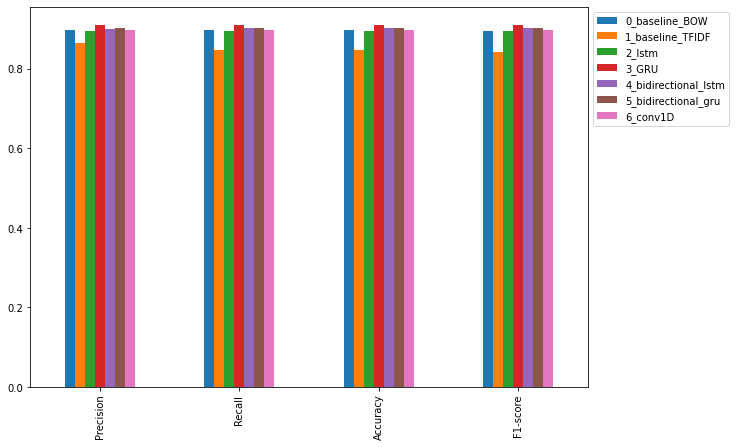

In [ ]:
all_model_results.plot(kind='bar',
                       figsize=(10,7)).legend(bbox_to_anchor=(1.0,1.0));

In [ ]:
all_model_results=all_model_results.transpose()

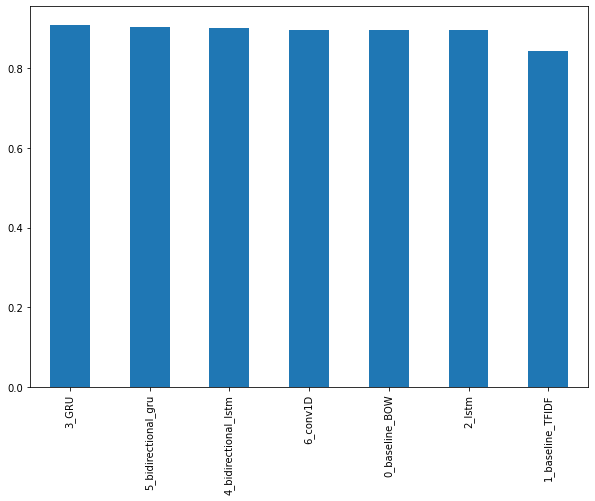

In [ ]:
all_model_results.sort_values('F1-score',ascending=False)['F1-score'].plot(kind='bar',figsize=(10,7));